In [1]:
import paddle
print(paddle.__version__)


2.4.2


In [2]:
from paddle.vision.transforms import Compose, Normalize

transform = Compose([Normalize(mean=[127.5],
                               std=[127.5],
                               data_format='CHW')])
# 使用transform对数据集做归一化
print('download training data and load training data')
train_dataset = paddle.vision.datasets.MNIST(mode='train', transform=transform)
test_dataset = paddle.vision.datasets.MNIST(mode='test', transform=transform)
print('load finished')


download training data and load training data
load finished


train_data0 label is: [5]


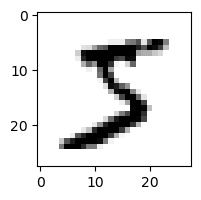

In [3]:
import numpy as np
import matplotlib.pyplot as plt
train_data0, train_label_0 = train_dataset[0][0],train_dataset[0][1]
train_data0 = train_data0.reshape([28,28])
plt.figure(figsize=(2,2))
plt.imshow(train_data0, cmap=plt.cm.binary)
print('train_data0 label is: ' + str(train_label_0))


In [4]:
import paddle
import paddle.nn.functional as F
class LeNet(paddle.nn.Layer):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = paddle.nn.Conv2D(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2)
        self.max_pool1 = paddle.nn.MaxPool2D(kernel_size=2,  stride=2)
        self.conv2 = paddle.nn.Conv2D(in_channels=6, out_channels=16, kernel_size=5, stride=1)
        self.max_pool2 = paddle.nn.MaxPool2D(kernel_size=2, stride=2)
        self.linear1 = paddle.nn.Linear(in_features=16*5*5, out_features=120)
        self.linear2 = paddle.nn.Linear(in_features=120, out_features=84)
        self.linear3 = paddle.nn.Linear(in_features=84, out_features=10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.max_pool1(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.max_pool2(x)
        x = paddle.flatten(x, start_axis=1,stop_axis=-1)
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        x = F.relu(x)
        x = self.linear3(x)
        return x


In [8]:
import paddle.nn.functional as F
train_loader = paddle.io.DataLoader(train_dataset, batch_size=64, shuffle=True)
# 加载训练集 batch_size 设为 64
def train(model):
    model.train()
    epochs = 2
    optim = paddle.optimizer.Adam(learning_rate=0.001, parameters=model.parameters())
    # 用Adam作为优化函数
    for epoch in range(epochs):
        for batch_id, data in enumerate(train_loader()):
            x_data = data[0]
            y_data = data[1]
            predicts = model(x_data)
            loss = F.cross_entropy(predicts, y_data)
            # 计算损失
            acc = paddle.metric.accuracy(predicts, y_data)
            loss.backward()
            if batch_id % 300 == 0:
                print("epoch: {}, batch_id: {}, loss is: {}, acc is: {}".format(epoch, batch_id, loss.numpy(), acc.numpy()))
            optim.step()
            optim.clear_grad()
model = LeNet()
train(model)


epoch: 0, batch_id: 0, loss is: [1.e-45], acc is: [0.]
epoch: 0, batch_id: 300, loss is: [0.], acc is: [0.]
epoch: 0, batch_id: 600, loss is: [0.], acc is: [0.]
epoch: 0, batch_id: 900, loss is: [0.], acc is: [0.]
epoch: 1, batch_id: 0, loss is: [7.e-45], acc is: [0.]
epoch: 1, batch_id: 300, loss is: [0.], acc is: [0.]
epoch: 1, batch_id: 600, loss is: [0.], acc is: [0.]
epoch: 1, batch_id: 900, loss is: [0.], acc is: [0.]


In [7]:
test_loader = paddle.io.DataLoader(test_dataset, places=paddle.CPUPlace(), batch_size=64)
# 加载测试数据集
def test(model):
    model.eval()
    batch_size = 64
    for batch_id, data in enumerate(test_loader()):
        x_data = data[0]
        y_data = data[1]
        predicts = model(x_data)
        # 获取预测结果
        loss = F.cross_entropy(predicts, y_data)
        acc = paddle.metric.accuracy(predicts, y_data)
        if batch_id % 20 == 0:
            print("batch_id: {}, loss is: {}, acc is: {}".format(batch_id, loss.numpy(), acc.numpy()))
test(model)


batch_id: 0, loss is: [4.e-45], acc is: [0.]
batch_id: 20, loss is: [1.e-45], acc is: [0.]
batch_id: 40, loss is: [1.e-45], acc is: [0.]
batch_id: 60, loss is: [1.e-45], acc is: [0.]
batch_id: 80, loss is: [1.e-45], acc is: [0.]
batch_id: 100, loss is: [1.e-45], acc is: [0.]
batch_id: 120, loss is: [1.e-45], acc is: [0.]
batch_id: 140, loss is: [1.e-45], acc is: [0.]
